In [1]:
import json
import pandas as pd

file = 'meet_kevin.json'
data = None
with open(file,'r') as f:
    data = json.load(f)

channel_id, stats = data.popitem()
print(channel_id)
channel_stats = stats['channel_statistics']
video_stats = stats['video_data']

UCUvvj5lwue7PspotMDjk5UA


In [2]:
# video statistics
sorted_vids = sorted(video_stats.items(),key=lambda item:int(item[1]['viewCount']),reverse=True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    comments = int(vid[1]['commentCount'])
    stats.append([video_id,title,views,likes,comments])

In [3]:
vids_df = pd.DataFrame(stats,columns=['VideoID','Title','Views','Likes','Comments'])
vids_df.head()

,VideoID,Title,Views,Likes,Comments
0,FBuXIBeepC0,"Kevin meets Kevin O'Leary | Inflation, Housing...",883481,21068,3115
1,4e281oFww3A,Running for Governor of California.,392370,29568,10331
2,dvAWrcA5yvk,An URGENT Warning for Investors,384358,15749,1901
3,n2cCbqkuUts,Fox News JUST Confronted me LIVE on TV,377623,27542,5729
4,HFryz4_T374,wtf... Biden JUST killed real estate (even more),351807,14541,4847


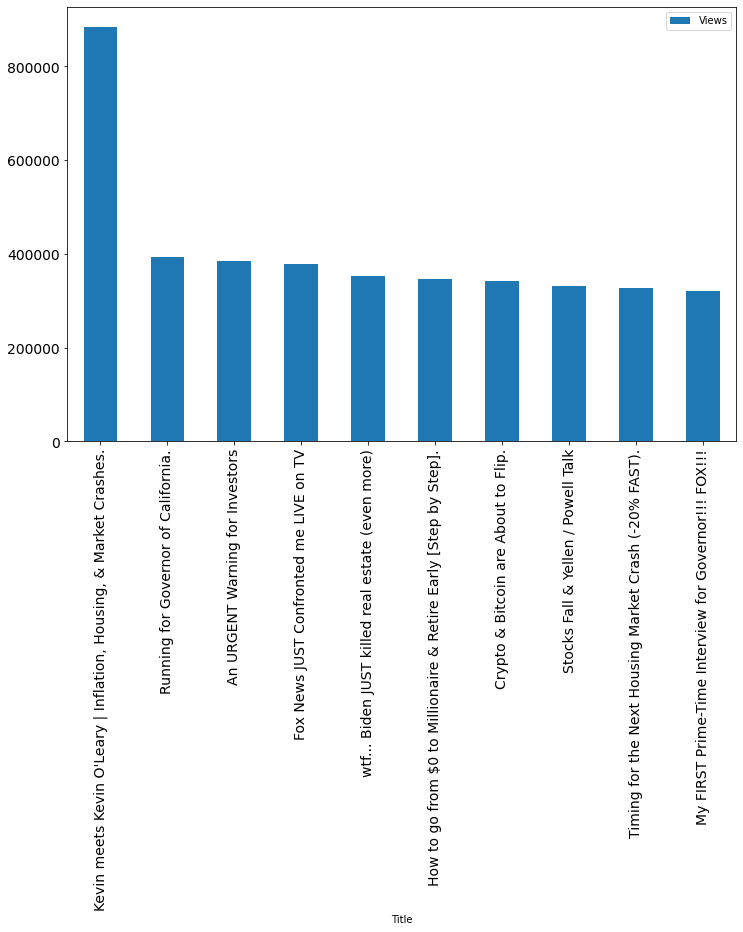

In [4]:
top10 = vids_df.head(10)
ax = top10.plot(kind='bar',x='Title',y='Views',figsize=(12,8),fontsize=14)            
                

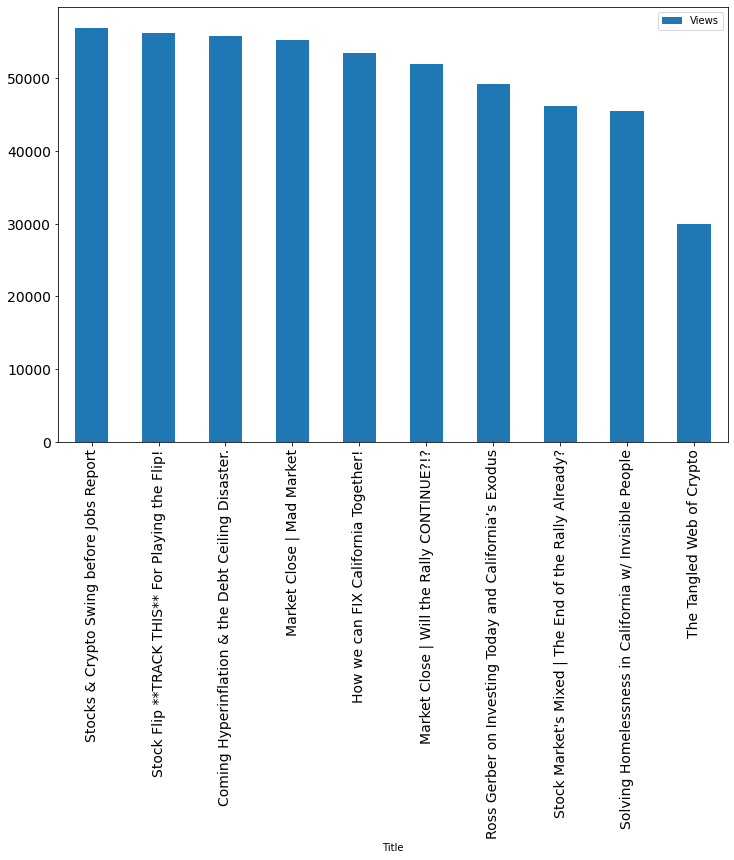

In [5]:
bottom10 = vids_df.tail(10)
ax = bottom10.plot(kind='bar',x='Title',y='Views',figsize=(12,8),fontsize=14)      


In [6]:
# channel statistics
channel_df = pd.DataFrame(columns=['Views','Subscribers','Video Count','Average Views'])
channel_df['Views'] = [int(channel_stats['viewCount'])]
channel_df['Likes'] = vids_df['Likes'].sum()
channel_df['Comments'] = vids_df['Comments'].sum()
channel_df['Subscribers'] = [int(channel_stats['subscriberCount'])]
channel_df['Video Count'] = [int(channel_stats['videoCount'])]
channel_df['Average Views'] = [int((channel_df['Views']/channel_df['Video Count']))]
channel_df['Average Likes'] = int(vids_df['Likes'].mean())
channel_df['Average Comments'] = int(vids_df['Comments'].mean())

channel_df.head()

,Views,Subscribers,Video Count,Average Views,Likes,Comments,Average Likes,Average Comments
0,456253531,1770000,2838,160765,2358194,432315,4642,851


In [7]:
filename = file[:file.index('.json')] + '.csv'
channel_df.to_csv(filename,index=False)